<a href="https://colab.research.google.com/github/imsidharthj/Fastai/blob/main/fastai_chepter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -Uqq fastai

In [9]:
from fastai.vision.all import *

In [10]:
path = untar_data(URLs.PETS)/'images'

In [11]:
def is_cat(x): return x[0].isupper()

In [12]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 19.9MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.199627,0.029632,0.010825,16:23


epoch,train_loss,valid_loss,error_rate,time
0,0.078362,0.030301,0.010149,23:09
1,0.040026,0.013051,0.004060,22:30
2,0.023505,0.008977,0.002706,23:13


In [14]:
learn.export('/content/drive/MyDrive/Colab Notebooks/archive/model.pkl')

In [3]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.9 MB/s eta 0:00:00


In [4]:
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

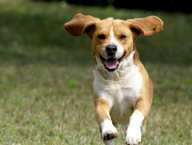

In [6]:
im = PILImage.create('/content/drive/MyDrive/Colab Notebooks/Fastai dog vs cat/Dog/dog.jpg')
im.thumbnail((192,192))
im

In [15]:
learn = load_learner('/content/drive/MyDrive/Colab Notebooks/archive/model.pkl')

In [16]:
learn.predict(im)

('False', tensor(0), tensor([1.0000e+00, 1.8539e-06]))

In [22]:
categories = ('Dog', 'Cat')

def classify_image(img):
    img = PILImage.create(img).resize((192,192))
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [18]:
classify_image(im)

{'Dog': 0.9999980926513672, 'Cat': 1.8538642052590149e-06}

In [24]:
!pip install --upgrade gradio

In [26]:
image = gr.Image()
label = gr.Label()
example = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=example)
intf.launch(inline=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://358a04528ecd56b835.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [27]:
m = learn.model

In [30]:
!pip install -Uqq nbdev

In [31]:
from nbdev.export import nb_export

In [35]:
!pip install nbconvert

In [36]:
!jupyter nbconvert --to script '/content/drive/MyDrive/Colab Notebooks.ipynb'

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab Notebooks.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.ans